# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&appid=" + weather_api_key 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Set the Get request 
        response = requests.get(city_url)
        
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | la'ie
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | akureyri
Processing Record 9 of Set 1 | kyzyl
Processing Record 10 of Set 1 | port-gentil
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | okha
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | puerto ayora
Proc

Processing Record 35 of Set 4 | hamilton
Processing Record 36 of Set 4 | sitka
Processing Record 37 of Set 4 | puerto baquerizo moreno
Processing Record 38 of Set 4 | tazovsky
Processing Record 39 of Set 4 | rabo de peixe
Processing Record 40 of Set 4 | selkirk
Processing Record 41 of Set 4 | hajin
Processing Record 42 of Set 4 | suonenjoki
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | same
Processing Record 46 of Set 4 | eleskirt
Processing Record 47 of Set 4 | tolanaro
Processing Record 48 of Set 4 | ewo
Processing Record 49 of Set 4 | aginskoye
Processing Record 0 of Set 5 | al fuwayliq
Processing Record 1 of Set 5 | catia la mar
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | katsuren-haebaru
Processing Record 4 of Set 5 | fort st. john
Processing Record 5 of Set 5 | fale old settlement
Processing Record 6 of Set 5 | havana
Processing Record 7 of Set 5 | tshikapa
Processing Record 8 of Set 5 

Processing Record 26 of Set 8 | kilindoni
Processing Record 27 of Set 8 | manaure
Processing Record 28 of Set 8 | sultanah
Processing Record 29 of Set 8 | pont rouge
Processing Record 30 of Set 8 | crane
Processing Record 31 of Set 8 | espargos
City not found. Skipping...
Processing Record 32 of Set 8 | asbe teferi
Processing Record 33 of Set 8 | inirida
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | bandar-e lengeh
Processing Record 36 of Set 8 | alzamay
Processing Record 37 of Set 8 | kone
Processing Record 38 of Set 8 | dean funes
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | antalaha
Processing Record 42 of Set 8 | hede
Processing Record 43 of Set 8 | udachny
Processing Record 44 of Set 8 | dumai
Processing Record 45 of Set 8 | port hedland
Processing Record 46 of Set 8 | howard springs
Processing Record 47 of Set 8 | kataragama
City not found. Skipping...
Processing Record 48 of Set 8 |

Processing Record 14 of Set 12 | thunder bay
Processing Record 15 of Set 12 | es castell
Processing Record 16 of Set 12 | alekseyevka
Processing Record 17 of Set 12 | labytnangi
Processing Record 18 of Set 12 | san andres
Processing Record 19 of Set 12 | san borja
Processing Record 20 of Set 12 | el galpon
Processing Record 21 of Set 12 | okayama
Processing Record 22 of Set 12 | bacalar
Processing Record 23 of Set 12 | ubari
Processing Record 24 of Set 12 | prado
Processing Record 25 of Set 12 | aransas pass
Processing Record 26 of Set 12 | pyapon
Processing Record 27 of Set 12 | petite riviere
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | xinyuan
Processing Record 30 of Set 12 | al hazm
Processing Record 31 of Set 12 | sao vicente
Processing Record 32 of Set 12 | soure
Processing Record 33 of Set 12 | twon-brass
Processing Record 34 of Set 12 | san fernando de apure
Processing Record 35 of Set 12 | archidona
Processing Record 36 of Set 12 | none
Processin

In [4]:
response = requests.get(city_url)
response

<Response [200]>

In [5]:
city_weather

{'coord': {'lon': -40.2925, 'lat': -20.3297},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 293.12,
  'feels_like': 293.65,
  'temp_min': 293.12,
  'temp_max': 293.12,
  'pressure': 1015,
  'humidity': 95},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 320},
 'clouds': {'all': 100},
 'dt': 1696121527,
 'sys': {'type': 2,
  'id': 2012383,
  'country': 'BR',
  'sunrise': 1696062217,
  'sunset': 1696106327},
 'timezone': -10800,
 'id': 3445026,
 'name': 'Vila Velha',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.80,87,100,10.89,PN,1696121338
1,san patricio,28.0170,-97.5169,303.20,67,0,5.90,US,1696121339
2,college,64.8569,-147.8028,283.75,46,40,3.60,US,1696121339
3,ushuaia,-54.8000,-68.3000,278.96,70,75,10.80,AR,1696121179
4,manokwari,-0.8667,134.0833,300.55,75,98,1.00,ID,1696121340


In [8]:
#Convert the temperature from Kelvin to Celsius

city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.65,87,100,10.89,PN,1696121338
1,san patricio,28.0170,-97.5169,30.05,67,0,5.90,US,1696121339
2,college,64.8569,-147.8028,10.60,46,40,3.60,US,1696121339
3,ushuaia,-54.8000,-68.3000,5.81,70,75,10.80,AR,1696121179
4,manokwari,-0.8667,134.0833,27.40,75,98,1.00,ID,1696121340


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.65,87,100,10.89,PN,1696121338
1,san patricio,28.0170,-97.5169,30.05,67,0,5.90,US,1696121339
2,college,64.8569,-147.8028,10.60,46,40,3.60,US,1696121339
3,ushuaia,-54.8000,-68.3000,5.81,70,75,10.80,AR,1696121179
4,manokwari,-0.8667,134.0833,27.40,75,98,1.00,ID,1696121340


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

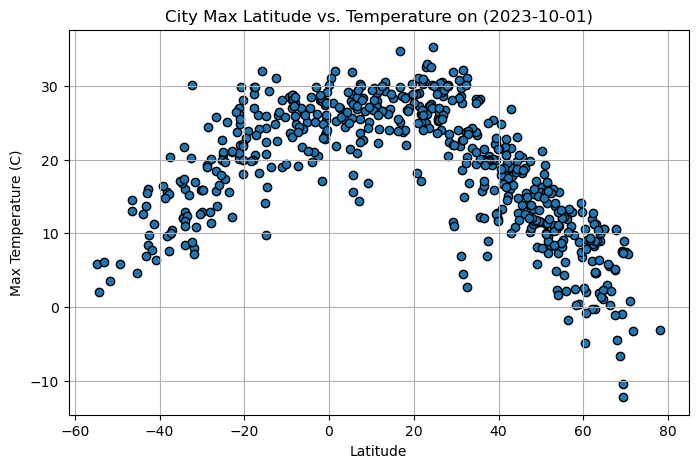

In [11]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]


#temperature_fahrenheit = city_data_df["Max Temp"]
temperature = city_data_df["Max Temp"]
date = city_data_df["Date"] 


# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')



plt.figure(figsize=(8, 5))
plt.scatter(latitude, temperature, marker="o", edgecolors="black")
#plt.scatter(latitude, temperature, marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")  # You can specify the unit you prefer
plt.title(f"City Max Latitude vs. Temperature on ({formatted_date.iloc[0]})")# Using the first date as an example
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

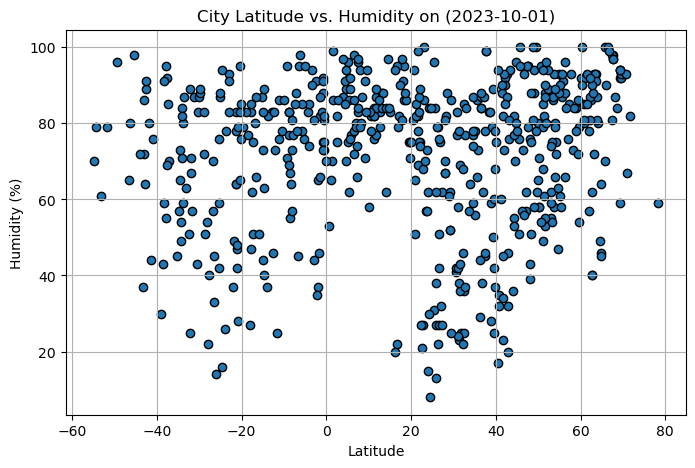

In [12]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
date = city_data_df["Date"]  # Since the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.figure(figsize=(8, 5))  
plt.scatter(latitude, humidity, marker="o",edgecolors="black")


# Incorporate the other graph properties
# Add labels and title with the formatted date
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on ({formatted_date.iloc[0]})")  # Using the first date as an example
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

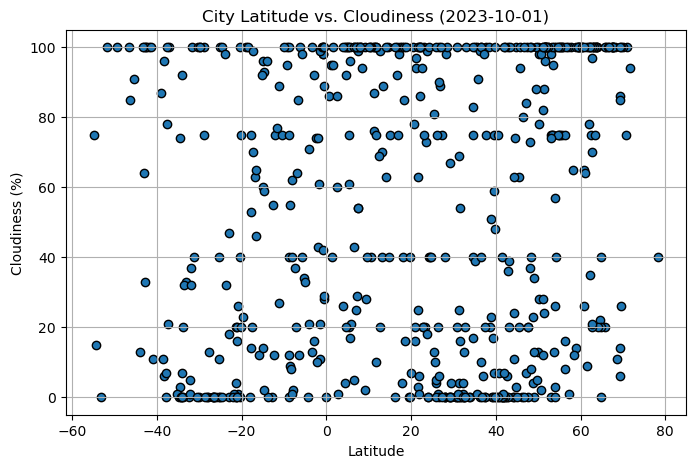

In [13]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
date = city_data_df["Date"]  # Assuming the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')


plt.figure(figsize=(8, 5))  # Set the figure size (optional)
plt.scatter(latitude, cloudiness, marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({formatted_date.iloc[0]})")  # Use the first date as an example

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

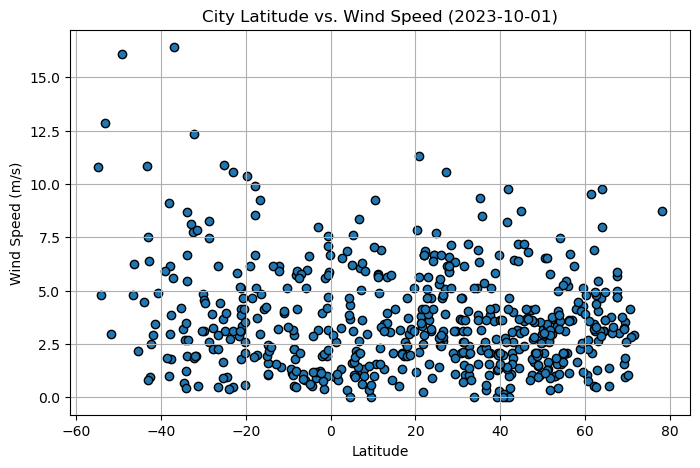

In [14]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
date = city_data_df["Date"]  # Assuming the date is stored as a timestamp

# Convert the date to a human-readable format (e.g., YYYY-MM-DD)
formatted_date = pd.to_datetime(date, unit='s').dt.strftime('%Y-%m-%d')

plt.figure(figsize=(8, 5))  # Set the figure size (optional)
plt.scatter(latitude, wind_speed, marker="o",edgecolors="black")

# Incorporate the other graph properties
# Add labels and title with the formatted date
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # You can specify the unit you prefer
plt.title(f"City Latitude vs. Wind Speed ({formatted_date.iloc[0]})")  # Use the first date as an example
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_coord, y_coord):
    #Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    #Using the linear regression function created previously
    regression_line = slope * x_data + intercept

    #Create a scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, marker="o")

    #Plot the regression line
    plt.plot(x_data, regression_line, color='red')

    #Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_data.name)


    #Display the correlation coefficient (r-value) above the plot
    correlation_text = f"The r-value is :{r_value**2}"
    plt.text(0,1.1, correlation_text, transform=plt.gca().transAxes, fontsize=11, color='black')


    #Add the linear regression equation to the plot
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, (x_coord, y_coord), fontsize=15, color='red')


    # Show the plot
    plt.show()

    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,30.05,67,0,5.90,US,1696121339
2,college,64.8569,-147.8028,10.60,46,40,3.60,US,1696121339
5,la'ie,21.6477,-157.9253,30.98,69,3,3.58,US,1696121340
7,akureyri,65.6835,-18.0878,2.96,100,20,0.51,IS,1696121340
8,kyzyl,51.7000,94.4500,9.51,53,100,0.32,RU,1696121341


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <= 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.65,87,100,10.89,PN,1696121338
3,ushuaia,-54.8000,-68.3000,5.81,70,75,10.80,AR,1696121179
4,manokwari,-0.8667,134.0833,27.40,75,98,1.00,ID,1696121340
6,atafu village,-8.5421,-172.5159,28.82,67,55,2.90,TK,1696121340
9,port-gentil,-0.7193,8.7815,25.43,88,98,7.54,GA,1696121341


###  Temperature vs. Latitude Linear Regression Plot

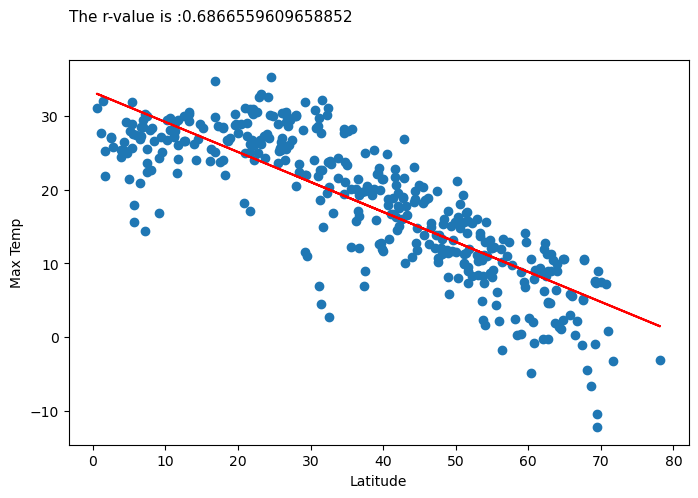

In [18]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]

#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 50, 40)


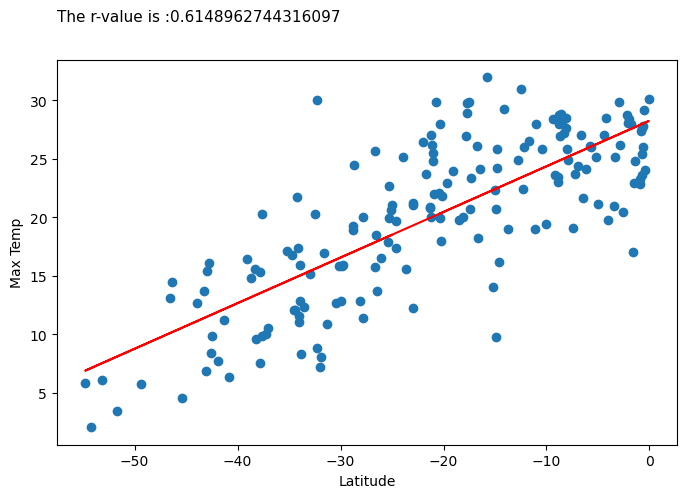

In [19]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -50, 35)

**Discussion about the linear relationship:** The r-value (coefficient of corelation) for Northern hemisphere is 0.6866 which is less than 1 and suggests that there exists a moderately strong positive correlation between the variables in question that is latitude and max. temperature.It seems to be a meaningful relationship but with some variability.As the latitude increases ,the max temp decreases but not very significantly.The values are clustered on the regression line.

The r-value for Southern hemisphere is 0.614 which suggests that there is a moderately positive corelation between the variables that is latitude and max temperature. As the latitude increases, it also leads to an increase in the max temperature but the values are not clustered.

### Humidity vs. Latitude Linear Regression Plot

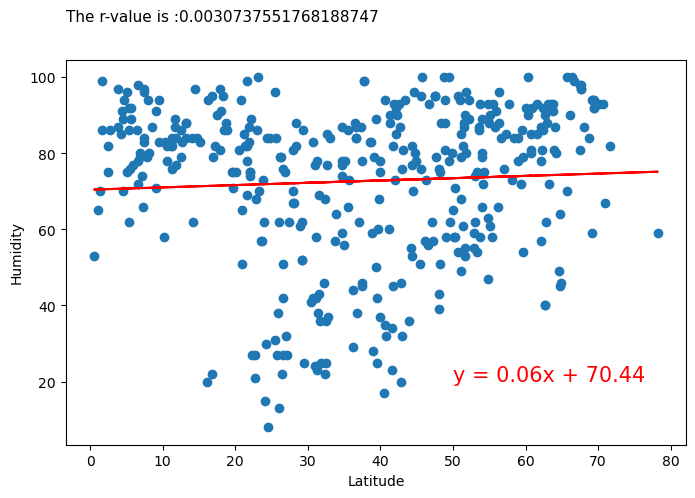

In [20]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]  # Use "Humidity" as Y data


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 50, 20)

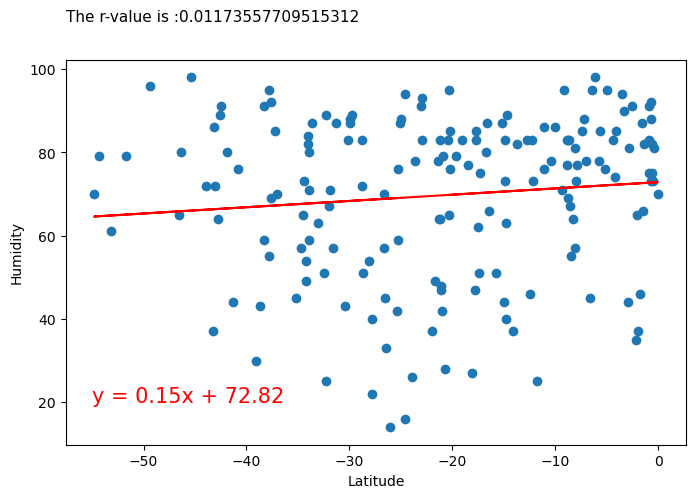

In [21]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"] 


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -55, 20)

**Discussion about the linear relationship:** For the northern hemisphere, the r-value for latitude versus humidity is 0.003 which is almost zero. A correlation coefficient of 0.003 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.

For the southern hemisphere, the r-value for latitude versus humidity is 0.011 which is almost zero. A correlation coefficient of 0.011 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.


### Cloudiness vs. Latitude Linear Regression Plot

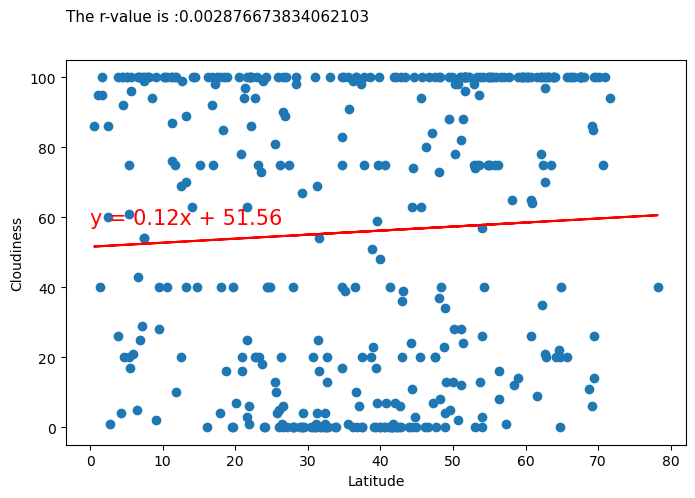

In [22]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 0, 58)

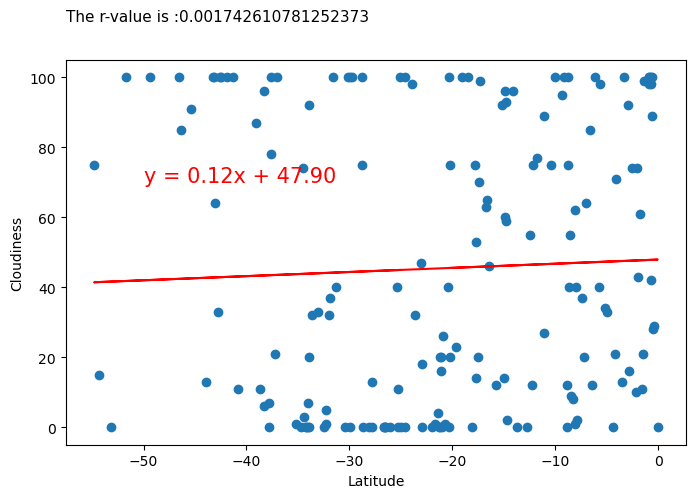

In [23]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -50, 70)

**Discussion about the linear relationship:** 
For the northern hemisphere, the r-value for latitude versus cloudiness is 0.0028 which is almost zero. A correlation coefficient of 0.0028 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.The values however seem to be clustered on cloudiness value 100 in a linear fashion.

For the southern hemisphere, the r-value for latitude versus cloudiness is 0.0017 which is almost zero. A correlation coefficient of 0.0017 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.


### Wind Speed vs. Latitude Linear Regression Plot

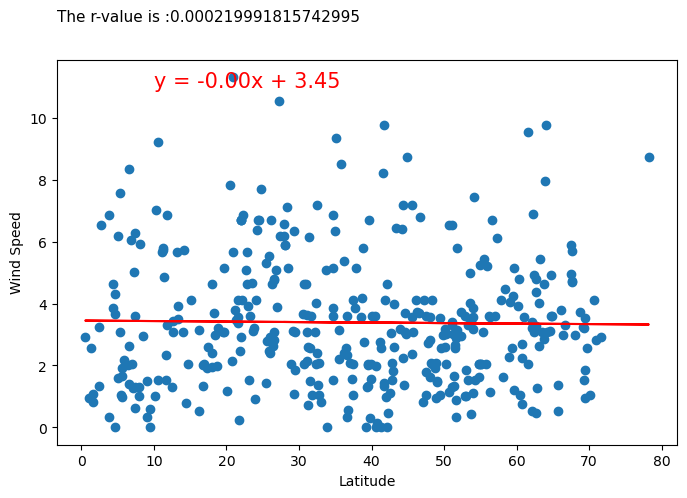

In [24]:
# Northern Hemisphere

# Extract the data for the Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, 10, 11)

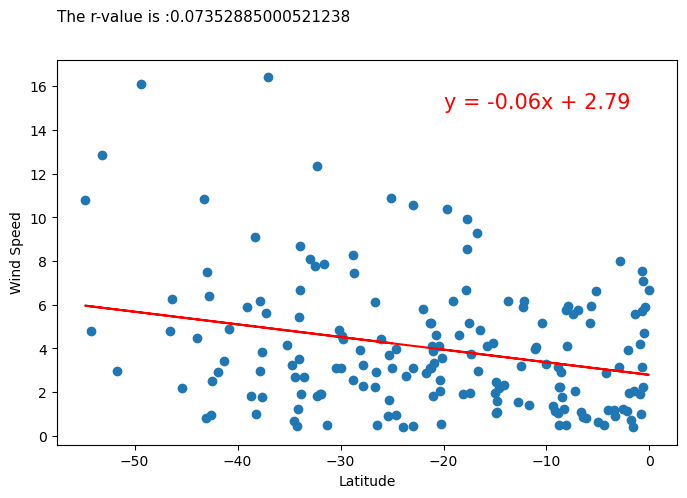

In [25]:
# Southern Hemisphere

# Extract the data for the Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]


#Calling the function to plot the graph
create_linear_regression_plot(x_data, y_data, -20, 15)

**Discussion about the linear relationship:** For the northern hemisphere, the r-value for latitude versus wind speed is 0.0002 which is almost zero. A correlation coefficient of 0.0002 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.The values however seem to be loosely clustered on cloudiness in the lower part of the plot.

For the southern hemisphere, the r-value for latitude versus wind speed is 0.073 which is almost zero. A correlation coefficient of 0.073 indicates a very weak or negligible linear relationship between two variables. It suggests that there is no meaningful linear association between the variables, and changes in one variable do not provide useful information about changes in the other variable.